# Regex

In [1]:
import re

In [2]:
#Check if the pattern present at the first word from a sentence
text = "Hello guys, let's start learning NLP with me Irwan"
pattern = 'Hello'
pattern2 = 'NLP'
result1 = re.match(pattern, text) 
result2 = re.match(pattern2, text)
result3 = re.match(pattern, text).group(0) #add group to get the word
print(result1, "  ==  ", result2, "  ==  ", result3)

<_sre.SRE_Match object; span=(0, 5), match='Hello'>   ==   None   ==   Hello


In [3]:
#Check if the pattern present in a sentence
text = 'I want study abroad to Japan, hope can go to Japan in 2022'
pattern = 'Japan'
result = re.search(pattern, text).group(0)
result

'Japan'

In [4]:
#return all words that match with our pattern
re.findall(pattern, text)

['Japan', 'Japan']

In [5]:
#find the itteration
result = re.finditer(pattern,text)
# for i in result:
#   print(i)
for i in result:
  print(i.start())

23
45


In [6]:
#find all the dates present in a sentence
text = 'Rudi was born on 28-11-1997 and Nasya on 29-04-1996'
pattern = r'\d{2}-\d{2}-\d{4}' #\d{2} : 2 digit number
re.findall(pattern, text)

['28-11-1997', '29-04-1996']

In [7]:
text = 'Rudi was born on 28 - 11 - 1997 and Nasya on 29-04-1996'
pattern = '\d{2}\s-\s\d{2}\s-\s\d{4}' #\d{2} : 2 digit number
re.findall(pattern, text)

['28 - 11 - 1997']

In [8]:
#split the string 
text = 'this is:banana,mango,avocado,etc'
pattern = r'[\s:,]' #split by pattern inside the bracket
re.split(pattern, text)

['this', 'is', 'banana', 'mango', 'avocado', 'etc']

In [9]:
#replace a string
text = 'Hellow Irwan, why you are so stupid'
pattern = 'stupid'
replacement = 'passionate'
re.sub(pattern, replacement, text)

'Hellow Irwan, why you are so passionate'

In [10]:
#get eamial pattern
text = "Rudi's email is rud_van@gmail.com yups"
pattern = '([\w.-]+)@([\w.-]+)'
re.search(pattern,text)

<_sre.SRE_Match object; span=(16, 33), match='rud_van@gmail.com'>

# Exploring Text Data

In [11]:
#read data from tweet.csv
import pandas as pd
df = pd.read_csv("tweets.csv", encoding = 'ISO-8859-1')
df.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


In [12]:
"""
Get word frequency (without preprocessing)
Note : the different between append and extend
       - append : it will return [[split sentence 1],[split, sentence 2], ...]
       - extend : it will return [all word in single arrray]
"""
import re
def get_freq(sentence):
  word_list = []
  for word in sentence.split():
    word_list.extend(word)
  word_freq = pd.Series(word_list).value_counts() #convert list to series, then count
  return word_freq

In [13]:
data_freq = get_freq(df.text.str)
data_freq.to_dict()

{'RT': 11053,
 'to': 7650,
 'is': 5152,
 'in': 4491,
 'the': 4331,
 'of': 4053,
 '#Demonetization': 3253,
 'demonetization': 3162,
 'on': 2751,
 '#demonetization': 2474,
 'PM': 2384,
 'Modi': 2379,
 'India': 2243,
 'and': 2220,
 'a': 2180,
 'that': 2168,
 'out': 1729,
 'for': 1672,
 'so': 1599,
 'had': 1598,
 'who': 1591,
 'Narendra': 1564,
 'by': 1488,
 'rich': 1477,
 'find': 1421,
 'Dear': 1407,
 'implement': 1399,
 'actually': 1370,
 'have': 1315,
 '@evanspiegel': 1306,
 '&amp;': 1302,
 '@URautelaForever:': 1273,
 'from': 1123,
 '@narendramodi': 1109,
 'Demonetization': 1099,
 'after': 992,
 'people': 975,
 'will': 906,
 'has': 896,
 '-': 862,
 'was': 845,
 'are': 789,
 'The': 766,
 'about': 760,
 'with': 756,
 '#DeMonetization': 742,
 'how': 732,
 '#demonetization.': 713,
 'Rs': 709,
 'bank': 701,
 'such': 663,
 'I': 658,
 'support': 656,
 'over': 634,
 'all': 610,
 'this': 609,
 'be': 609,
 'against': 605,
 'And': 604,
 'lakh': 603,
 'since': 575,
 'terrorists': 553,
 "That's": 55

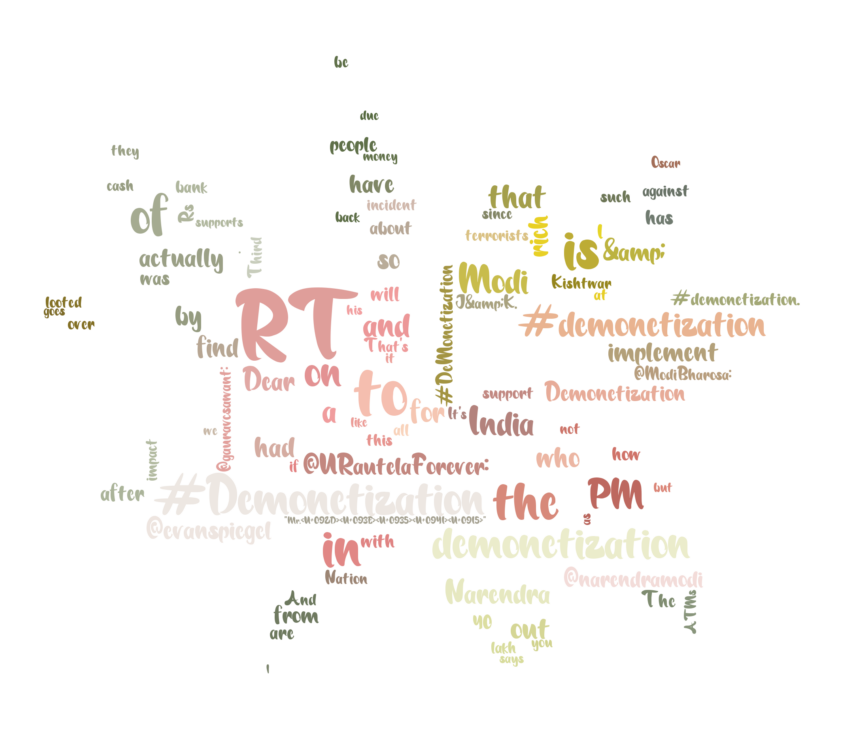

In [14]:
#create wordcloud 
#https://towardsdatascience.com/create-word-cloud-into-any-shape-you-want-using-python-d0b88834bc32
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from wordcloud import ImageColorGenerator

mask = np.array(Image.open('flower.png'))
mask_colors = ImageColorGenerator(mask)
wc = WordCloud(width=mask.shape[1], height=mask.shape[0], mask=mask, min_font_size=20,
               max_font_size=256, random_state=42,color_func=mask_colors,
               max_words=2000, background_color='white', font_path='Moonliona.ttf')
#wc.generate(text.txt)
wc.generate_from_frequencies(data_freq)

plt.figure(figsize=(15,30))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
#Text Cleansingand stopword removal
import re
from string import punctuation

TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(text):
    return TAG_RE.sub('', text)

def clean_text(text):
    #Remove RT
    text = re.sub(r'RT', '', text)      
    text = remove_tags(text)                                                                                                                              
    #Fix &
    text = re.sub(r'&amp;', '', text)
    #Remove punctuations
    text = re.sub(r'[?!.;:,#@-]', '', text)
    #Convert to lowercase to maintain consistency
    text = text.lower()
    return text
# print(STOPWORDS)

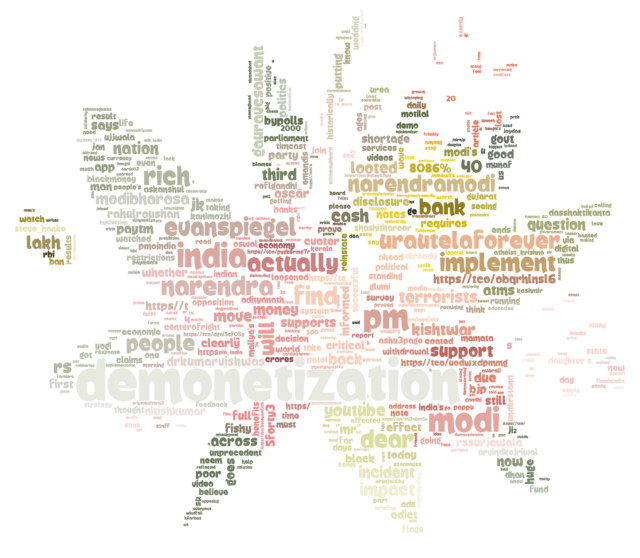

In [16]:
#df.text is the tweet text
text = df.text.apply(lambda x: clean_text(x))
word_freq = get_freq(text.str)
#STOPWORDS.add('AAA') how to add data on stopwords (inside set)
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

mask = np.array(Image.open('flower.png'))
mask_colors = ImageColorGenerator(mask)
wc = WordCloud(width=mask.shape[1], height=mask.shape[0], mask=mask, min_font_size=5,
               max_font_size=256, random_state=42,color_func=mask_colors,  
               max_words=500, background_color='white', font_path='Winear.ttf')
#wc.generate(text.txt)
wc.generate_from_frequencies(word_freq)

plt.figure(figsize=(13,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
#https://courses.analyticsvidhya.com/courses/take/Intro-to-NLP/lessons/6734627-part-of-speech-tagging-and-grammar-parsing

# Text Preprocessing using NLTK

In [18]:
#tokenization
import nltk
from nltk import ngrams
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

## Tokenization

In [19]:
sentence = "Hai Rudi, great to see you? I will go to Japan next year. Do you want to go there together? Maybe we can do exciting activity in Sibuya or Osaka"
sent_tokenize(sentence) #split based on the sentence

['Hai Rudi, great to see you?',
 'I will go to Japan next year.',
 'Do you want to go there together?',
 'Maybe we can do exciting activity in Sibuya or Osaka']

In [20]:
#split per word
#using re.split(r'[;,\s]' sentence)
word_tokenize(sentence)

['Hai',
 'Rudi',
 ',',
 'great',
 'to',
 'see',
 'you',
 '?',
 'I',
 'will',
 'go',
 'to',
 'Japan',
 'next',
 'year',
 '.',
 'Do',
 'you',
 'want',
 'to',
 'go',
 'there',
 'together',
 '?',
 'Maybe',
 'we',
 'can',
 'do',
 'exciting',
 'activity',
 'in',
 'Sibuya',
 'or',
 'Osaka']

In [21]:
#split n grams
s=" "
for i in ngrams(sentence.split(), 3):
  print(s.join(i))

Hai Rudi, great
Rudi, great to
great to see
to see you?
see you? I
you? I will
I will go
will go to
go to Japan
to Japan next
Japan next year.
next year. Do
year. Do you
Do you want
you want to
want to go
to go there
go there together?
there together? Maybe
together? Maybe we
Maybe we can
we can do
can do exciting
do exciting activity
exciting activity in
activity in Sibuya
in Sibuya or
Sibuya or Osaka


## Stemming, Lemmatization and Postag

In [22]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
stemmer = PorterStemmer()
print(stemmer.stem("Playing")) #return to the basic word
print(stemmer.stem("Plays"))
print(stemmer.stem("Played"))
print(stemmer.stem("Increases"))
#sometimes steaming is not good choice to preprocessing the data

play
play
play
increas


In [23]:
#lemmatizer using postag (u can explore it by yourself)
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
# ADJ, ADJ_SAT, ADV, NOUN, VERB = "a", "s", "r", "n", "v"
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize('runing'))
print(lemmatizer.lemmatize('runing', wordnet.VERB))

runing
run


In [24]:
#postag
from nltk import pos_tag
text = "i love you baby it is quite alright"
tokens = word_tokenize(text)
pos_tag(tokens)

[('i', 'NN'),
 ('love', 'VBP'),
 ('you', 'PRP'),
 ('baby', 'VBP'),
 ('it', 'PRP'),
 ('is', 'VBZ'),
 ('quite', 'RB'),
 ('alright', 'JJ')]

In [25]:
#synonym
from nltk.corpus import wordnet
wordnet.synsets('good')
wordnet.synsets('motor')

[Synset('motor.n.01'),
 Synset('motor.n.02'),
 Synset('drive.v.02'),
 Synset('centrifugal.s.03'),
 Synset('motive.s.01')]

In [26]:
#bigram
for word in ngrams(word_tokenize(text), 2):
  print(word)

('i', 'love')
('love', 'you')
('you', 'baby')
('baby', 'it')
('it', 'is')
('is', 'quite')
('quite', 'alright')


# Basic Text Classification analytic vidya version

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
dataset = pd.read_csv("final_dataset_basicmlmodel.csv", encoding = 'ISO-8859-1')
dataset.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


## Hastag and Mention Graphic

In [28]:
example = pd.DataFrame(["nama @irwan_afandi #suka dengan @siapa_saja", 
                  "Hey kau! @milan_89 jangan terlalu banyak #omong dengan @min91",
                  "Kursi si @irwan_afandi diambil @milan_89 #mampus #omong",
                  "@mamamia #suka dengan @irwan_afandi tapi @min91 gak trima #omong"], columns=["tweet"])

def get_mention_hastag(dataset):
  mentions_freq, hastag_freq = {}, {}
  for sentence in dataset:
    #if want to delete @, so just username without @ = (^|[^@\w])@(\w+)
    result = re.findall("(^|[^@\w])(@\w+)", sentence)
    for mention in result:
      if mention[1] not in mentions_freq:
        mentions_freq[mention[1]] = 1
      else:
        mentions_freq[mention[1]] += 1

    result2 = re.findall("#\w+", sentence)
    for mention in result2:
      if mention not in hastag_freq:
        hastag_freq[mention] = 1
      else:
        hastag_freq[mention] += 1

  return mentions_freq, hastag_freq

mentions_freq_ex, hastag_freq_ex = get_mention_hastag(example["tweet"])
print(mentions_freq_ex)
print(hastag_freq_ex)

{'@irwan_afandi': 3, '@siapa_saja': 1, '@milan_89': 2, '@min91': 2, '@mamamia': 1}
{'#suka': 2, '#omong': 3, '#mampus': 1}


In [29]:
mentions_freq, hastag_freq = get_mention_hastag(dataset["tweet"])
print(mentions_freq)
print(hastag_freq)

{'@user': 3343}
{'#run': 1, '#lyft': 1, '#disapointed': 1, '#getthanked': 1, '#model': 44, '#motivation': 20, '#allshowandnogo': 1, '#school': 3, '#exams': 2, '#hate': 36, '#imagine': 1, '#actorslife': 2, '#revolutionschool': 1, '#girl': 21, '#allin': 1, '#cavs': 1, '#champions': 1, '#cleveland': 8, '#clevelandcavaliers': 1, '#gr8': 1, '#ireland': 3, '#blog': 44, '#silver': 42, '#gold': 41, '#forex': 37, '#orlando': 28, '#standwithorlando': 1, '#pulseshooting': 2, '#orlandoshooting': 7, '#biggerproblems': 1, '#selfish': 1, '#heabreaking': 3, '#values': 1, '#love': 165, '#80days': 1, '#gettingfed': 1, '#got7': 1, '#junior': 1, '#yugyoem': 1, '#omg': 4, '#thankful': 53, '#positive': 90, '#friday': 22, '#cookies': 1, '#euro2016': 13, '#badday': 2, '#coneofshame': 1, '#cats': 2, '#pissed': 5, '#funny': 16, '#laughs': 1, '#wine': 3, '#weekend': 33, '#tgif': 6, '#ff': 4, '#gamedev': 2, '#indiedev': 2, '#indiegamedev': 2, '#squad': 3, '#upsideofflorida': 2, '#shopalyssas': 3, '#smiles': 5, '#

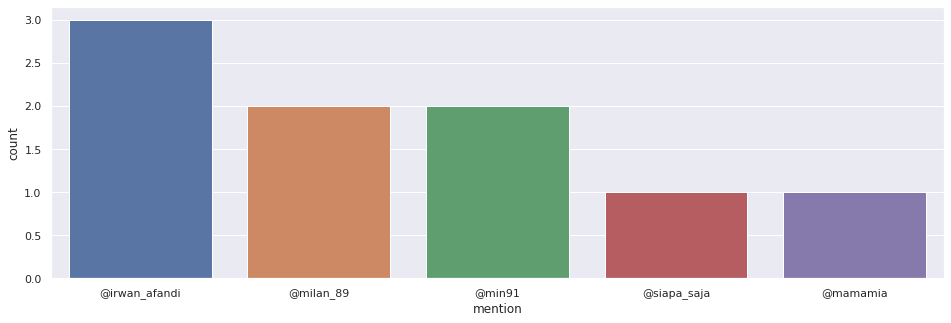

In [30]:
mention = pd.DataFrame({'mention': list(mentions_freq_ex.keys()),
                        'count': list(mentions_freq_ex.values())})
mention = mention.nlargest(columns="count", n=10)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=mention, x = "mention", y = "count")

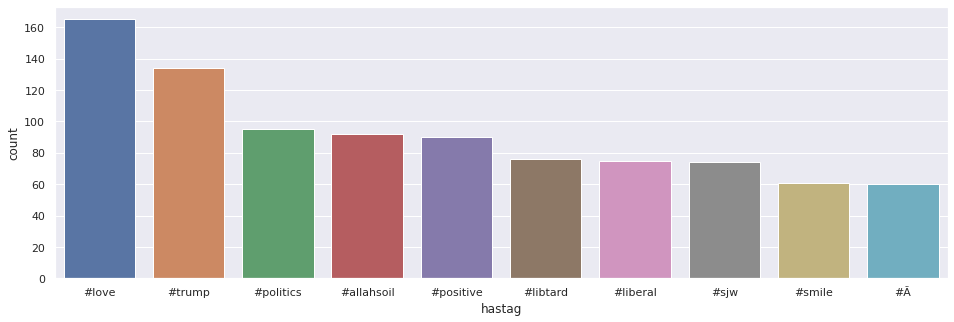

In [31]:
hastag = pd.DataFrame({'hastag': list(hastag_freq.keys()),
                        'count': list(hastag_freq.values())})
hastag = hastag.nlargest(columns="count", n=10)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=hastag, x = "hastag", y = "count")

## Data Cleansing

In [32]:
from string import punctuation

def clean_dataset(text):
    text = text.lower()
    #replace not letter with space
    text = re.sub(r'[^a-zA-Z\']', ' ', text)
    #Remove Unicode characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    
    return text

In [33]:
dataset['clean_text'] = dataset.tweet.apply(lambda x: clean_text(x))

## Feature Engineering

In [34]:
STOP_WORDS = ['a', 'about', 'above', 'after', 'again', 'against', 'all', 'also', 'am', 'an', 'and',
              'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below',
              'between', 'both', 'but', 'by', 'can', "can't", 'cannot', 'com', 'could', "couldn't", 'did',
              "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'else', 'ever',
              'few', 'for', 'from', 'further', 'get', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having',
              'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how',
              "how's", 'however', 'http', 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it',
              "it's", 'its', 'itself', 'just', 'k', "let's", 'like', 'me', 'more', 'most', "mustn't", 'my', 'myself',
              'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'otherwise', 'ought', 'our', 'ours',
              'ourselves', 'out', 'over', 'own', 'r', 'same', 'shall', "shan't", 'she', "she'd", "she'll", "she's",
              'should', "shouldn't", 'since', 'so', 'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs',
              'them', 'themselves', 'then', 'there', "there's", 'these', 'they', "they'd", "they'll", "they're",
              "they've", 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 'very', 'was', "wasn't",
              'we', "we'd", "we'll", "we're", "we've", 'were', "weren't", 'what', "what's", 'when', "when's", 'where',
              "where's", 'which', 'while', 'who', "who's", 'whom', 'why', "why's", 'with', "won't", 'would', "wouldn't",
              'www', 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves']

#Generate word frequency
def gen_freq(text):
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in text.split():
        word_list.extend(tw_words)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()
    
    #Drop the stopwords during the frequency calculation
    word_freq = word_freq.drop(STOP_WORDS, errors='ignore')
    
    return word_freq

#Check whether a negation term is present in the text
def any_neg(words):
    for word in words:
        if word in ['n', 'no', 'non', 'not'] or re.search(r"\wn't", word):
            return 1
    else:
        return 0

#Check whether one of the 100 rare words is present in the text
def any_rare(words, rare_100):
    for word in words:
        if word in rare_100:
            return 1
    else:
        return 0

#Check whether prompt words are present
def is_question(words):
    for word in words:
        if word in ['when', 'what', 'how', 'why', 'who']:
            return 1
    else:
        return 0

In [35]:
word_freq = gen_freq(dataset.clean_text.str)
#100 most rare words in the dataset
rare_100 = word_freq[-100:]
#Number of words in a tweet
dataset['word_count'] = dataset.clean_text.str.split().apply(lambda x: len(x))
#Negation present or not
dataset['any_neg'] = dataset.clean_text.str.split().apply(lambda x: any_neg(x))
#Prompt present or not
dataset['is_question'] = dataset.clean_text.str.split().apply(lambda x: is_question(x))
#Any of the most 100 rare words present or not
dataset['any_rare'] = dataset.clean_text.str.split().apply(lambda x: any_rare(x, rare_100))
#Character count of the tweet
dataset['char_count'] = dataset.clean_text.apply(lambda x: len(x))

In [36]:
#Top 10 common words are
gen_freq(dataset.clean_text.str)[:10]

user      3329
love       296
ã¢ââ¦     269
day        231
trump      204
happy      198
will       190
people     174
new        166
u          150
dtype: int64

In [37]:
dataset.head()

,id,label,tweet,clean_text,word_count,any_neg,is_question,any_rare,char_count
0,1,0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is so...,18,0,1,0,99
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i can't use c...,19,1,0,0,116
2,3,0,bihday your majesty,bihday your majesty,3,0,0,0,21
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...,14,0,0,0,114
4,5,0,factsguide: society now #motivation,factsguide society now motivation,4,0,0,0,37


## Split the Data

In [38]:
from sklearn.model_selection import train_test_split

X = dataset[['word_count', 'any_neg', 'any_rare', 'char_count', 'is_question']]
y = dataset.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=27)

## Build a Model

In [39]:
from sklearn.naive_bayes import GaussianNB

#Initialize GaussianNB classifier
model = GaussianNB()
#Fit the model on the train dataset
model = model.fit(X_train, y_train)
#Make predictions on the test dataset
pred = model.predict(X_test)

## Evaluate the Model

In [40]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, pred)*100, "%")

Accuracy: 59.42857142857143 %


# Build Bows and TFIDF from Scratch
include how do I clean the dataset

In [41]:
import pandas as pd
dataset = pd.read_csv("final_dataset_basicmlmodel.csv", encoding = 'ISO-8859-1')
dataset.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


## Data cleansing

In [42]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from wordcloud import STOPWORDS
from tqdm.auto import tqdm

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [43]:
STOPWORD = set(stopwords.words('english'))
#Join with wordcloud stopword
STOPWORD |= STOPWORDS

In [44]:
import re
from string import punctuation
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
text = "@muraynama adalah seorang yang songong dan tidak bermodal #sukangadu. I runing love about montain after watched this video<ha>"
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def text_cleansing (text):
  #remove mention account
  text = re.sub(r'@\w+', '', text)
  #remove hastag
  # text = re.sub(r'#\w+', '', text)
  #remove html structure
  text = re.sub(r'<[^>]+>', '', text)
  #remove html structure
  text = re.sub(r'\d', '', text)

  #Remove Unicode characters
  text = re.sub(r'[^\x00-\x7F]+', '', text)

  #remove pactuation inside the word
  punctuation = "!\"$%&'()*+,-./:;<=>?@[\]^_`{|}~"
  pact_value  = str.maketrans('','',punctuation)
  text = [w.translate(pact_value) for w in text]
  text = ''.join(text)

  #tokenize
  text = text.split()

  #case folding and stopword removing
  text = [word.lower() for word in text if word not in STOPWORD]

  #lematization or stemming
  text = [lemmatizer.lemmatize(word) for word in text if len(word)>2]
  # text = [stemmer.stem((word) for word in text]

  text = ' '.join(text)
  return text

In [45]:
dataset['clean_text'] = dataset.tweet.apply(lambda x: text_cleansing(x))
dataset.head()

,id,label,tweet,clean_text
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cant use cause dont offer ...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,#model love take time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


## Scratch BOW

In [46]:
#feature extraction
import pandas as pd
import collections
import time 
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

#time complexity
!pip install line_profiler
%load_ext line_profiler

     |████████████████████████████████| 71kB 3.1MB/s 


In [47]:
text = pd.DataFrame()
text['clean_text'] = ["saya zakaria suka makan nasi nasi dan lauk", "saya pesan nasi dan tahu", "tahu buat makan"]

In [48]:
def get_corpus_vocabs(dataset):
  vocabs_freq = {}
  for sentence in dataset:
    for word in sentence.split():
      if word not in vocabs_freq:
        vocabs_freq[word] = 1
      else:
        vocabs_freq[word] += 1

  vocabs_freq = collections.OrderedDict(sorted(vocabs_freq.items()))
  return vocabs_freq

def doc_vocab(sentence):
  #get word freq in every document
  bows = {}
  for word in sentence.split():
    if word not in bows:
      bows[word] = 1
    else:
      bows[word] += 1
  return bows

def bow_doc(dataset):
  #get vocabulary
  vocabs_freq = get_corpus_vocabs(dataset)
  vocabs_items = list(vocabs_freq.items())

  #itteration for every document [0 for i in range(len(corpus))]
  document_bows, null_array, vocabs = [], np.zeros((1,len(vocabs_freq))), list(vocabs_freq.keys())
  for sentence in tqdm(dataset):
    #get word freq in single document
    bows = doc_vocab(sentence)

    #set all bows of a single document 0
    doc_bow = null_array.copy()
    for vocab, val in bows.items():
      #replace bows value, with bow appear in that doc
      doc_bow[0][vocabs.index(vocab)] = val
    
    #append in document_bows
    document_bows.append(doc_bow)
  return pd.DataFrame(np.concatenate(document_bows), columns= vocabs)

In [49]:
start = time.time()
%lprun -f bow_doc bow_doc(dataset["clean_text"])
# bow_doc(dataset, "clean_text")
end = time.time()
print(f"Runtime of the program is {end - start}")


Runtime of the program is 7.458778142929077


In [50]:
bow_doc(text["clean_text"])

,buat,dan,lauk,makan,nasi,pesan,saya,suka,tahu,zakaria
0,0.0,1.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [51]:
cvec = CountVectorizer()
pd.DataFrame(cvec.fit_transform(text['clean_text']).todense(), columns=cvec.get_feature_names())

,buat,dan,lauk,makan,nasi,pesan,saya,suka,tahu,zakaria
0,0,1,1,1,2,0,1,1,0,1
1,0,1,0,0,1,1,1,0,1,0
2,1,0,0,1,0,0,0,0,1,0


### Bows Data

- My code 7.5 times slower than the CountVectorizer Library 

In [52]:
start = time.time()
cvec = CountVectorizer()
bows_countvectorizer = pd.DataFrame(cvec.fit_transform(dataset['clean_text']).todense(), columns=cvec.get_feature_names())
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 0.1753063201904297


In [53]:
start = time.time()
bows_original = bow_doc(dataset["clean_text"])
end = time.time()
print(f"Runtime of the program is {end - start}")


Runtime of the program is 6.750598669052124


In [54]:
bows_original

,####amp,###sunday,##kkk,#aa,#aande,#aap,#aaps,#aba,#abandoned,#abba,#abc,#aberdeen,#ableism,#abpoli,#abrahamhicks,#abs,#abstract,#abundance,#abuse,#abusive,#acab,#accessories,#accessories#italy#roma#top,#accident,#ace,#achievement,#acne,#across,#acting,#actions,#activism,#activists,#actor,#actorslife,#ad,#adamitv,#adamsaleh,#adc,#addiction,#adele,...,yoube,youd,youll,young,younger,youre,yousoo,youth,youtu,youtube,youve,yoy,yoyas,yr,yrold,ytinny,yuki,yummy,yunho,yup,yur,yusuf,zara,zayne,zealand,zedd,zero,zilles,zimbabwe,zionism,zit,ziy,zoing,zone,zoo,zpamdelacruz,zulu,zuma,zurich,zydeco
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
bows_countvectorizer

,aa,aaaaand,aaahh,aaahhhhh,aaberg,aampe,aande,aap,aaps,aba,abandon,abandoned,abba,abc,abd,abe,abeed,aberdeen,aberrant,abetting,ability,able,ableism,aboion,abou,abpoli,abrahamhicks,abs,absence,absolute,absolutely,abstract,absurd,abt,abuja,abundance,abundant,abuse,abused,abusive,...,yum,yummy,yummyfood,yunho,yup,yur,yusuf,yvr,yyc,yyt,zara,zayne,zaz,zealand,zedd,zeenews,zelda,zen,zero,zeroattacks,zilles,zim,zimbabwe,zionazi,zionazis,zionism,zionist,zionists,zit,ziy,zoing,zone,zoo,zoomzoom,zpamdelacruz,zulu,zuma,zumba,zurich,zydeco
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5238,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5239,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5240,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Scratch TF-IDF

Formula

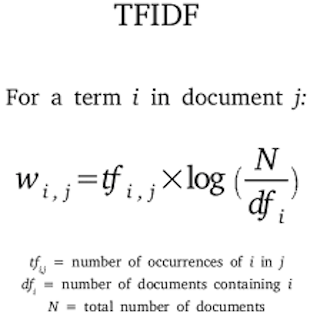

In [56]:
tfvec = TfidfVectorizer()
pd.DataFrame(tfvec.fit_transform(text['clean_text']).todense(), columns=tfvec.get_feature_names())
# """
# saya zakaria suka makan nasi nasi dan lauk
# saya pesan nasi dan tahu
# tahu buat makan
# """

,buat,dan,lauk,makan,nasi,pesan,saya,suka,tahu,zakaria
0,0.000000,0.286455,0.376654,0.286455,0.572910,0.000000,0.286455,0.376654,0.000000,0.376654
1,0.000000,0.417796,0.000000,0.000000,0.417796,0.549351,0.417796,0.000000,0.417796,0.000000
2,0.680919,0.000000,0.000000,0.517856,0.000000,0.000000,0.000000,0.000000,0.517856,0.000000


In [57]:
pd.DataFrame(cvec.fit_transform(text['clean_text']).todense(), columns=cvec.get_feature_names())

,buat,dan,lauk,makan,nasi,pesan,saya,suka,tahu,zakaria
0,0,1,1,1,2,0,1,1,0,1
1,0,1,0,0,1,1,1,0,1,0
2,1,0,0,1,0,0,0,0,1,0


### TFIDF word "Buat" = 1/3 log (3/1)

In [58]:
import math
print((1/3)*math.log((1+3)/(1+1)+1))
print((1/3)*math.log( 3 / float(1) + 1))
print((1/3)*math.log(3 /1))

0.3662040962227032
0.46209812037329684
0.3662040962227032


### TF

In [59]:
def get_tf(dataset, column):
  #dictionary contains bows of every document
  dataset["dictionary"] = dataset[column].apply(lambda x: doc_vocab(x))
  #get vocabs with its frequency in the corpus
  vocabs_freq = get_corpus_vocabs(dataset[column])
  #list of existing vocabs in the corpus
  vocabs = list(vocabs_freq.keys())
  # initiation TF array, null value initiation 
  tf, null_data = [], np.zeros((1,len(vocabs_freq)))
  
  for index, row in tqdm(dataset.iterrows()):
    #set null value for single tf_doc, len sentence in that doc
    doc_tf, len_sentence = null_data.copy(), len(row['clean_text'].split())
    #looping of bows in single doc
    for word, val in row['dictionary'].items():
      #update doc_tf
      doc_tf[0][vocabs.index(word)] = float(val)/float(len_sentence)
    tf.append(doc_tf)
  dataset.drop("dictionary", axis=1, inplace=True)
  return pd.DataFrame(np.concatenate(tf), columns= vocabs)

In [60]:
get_tf(text, "clean_text")

,buat,dan,lauk,makan,nasi,pesan,saya,suka,tahu,zakaria
0,0.000000,0.125,0.125,0.125000,0.25,0.0,0.125,0.125,0.000000,0.125
1,0.000000,0.200,0.000,0.000000,0.20,0.2,0.200,0.000,0.200000,0.000
2,0.333333,0.000,0.000,0.333333,0.00,0.0,0.000,0.000,0.333333,0.000


### IDF

In [61]:
def get_idf(dataset, column):
  dict_idf, doc_number = {}, dataset.shape[0]
  vocabs_freq = get_corpus_vocabs(dataset[column])
  for word, val in tqdm(vocabs_freq.items()):
    count_doc = dataset[column].str.contains(word).sum()
    dict_idf[word] = math.log(doc_number/float(count_doc)+1)
  return dict_idf

In [62]:
start = time.time()
%lprun -f get_idf get_idf(dataset, "clean_text")
# bow_doc(dataset, "clean_text")
end = time.time()
print(f"Runtime of the program is {end - start}")

# get_idf(dataset, "clean_text")


Runtime of the program is 61.222540855407715


In [63]:
get_idf(text, "clean_text")

{'buat': 1.3862943611198906,
 'dan': 0.9162907318741551,
 'lauk': 1.3862943611198906,
 'makan': 0.9162907318741551,
 'nasi': 0.9162907318741551,
 'pesan': 1.3862943611198906,
 'saya': 0.9162907318741551,
 'suka': 1.3862943611198906,
 'tahu': 0.9162907318741551,
 'zakaria': 1.3862943611198906}

### TFIDF

In [64]:
def get_tfidf(dataset, column):
  tf = get_tf(dataset, column)
  idf = get_idf(dataset, column)
  return tf*idf.values()

In [65]:
# get_tfidf(text, "clean_text").iloc[:, :-1] if label is existing
get_tfidf(text, "clean_text")

,buat,dan,lauk,makan,nasi,pesan,saya,suka,tahu,zakaria
0,0.000000,0.114536,0.173287,0.114536,0.229073,0.000000,0.114536,0.173287,0.000000,0.173287
1,0.000000,0.183258,0.000000,0.000000,0.183258,0.277259,0.183258,0.000000,0.183258,0.000000
2,0.462098,0.000000,0.000000,0.305430,0.000000,0.000000,0.000000,0.000000,0.305430,0.000000


In [66]:
pd.DataFrame(tfvec.fit_transform(text['clean_text']).todense())

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.286455,0.376654,0.286455,0.572910,0.000000,0.286455,0.376654,0.000000,0.376654
1,0.000000,0.417796,0.000000,0.000000,0.417796,0.549351,0.417796,0.000000,0.417796,0.000000
2,0.680919,0.000000,0.000000,0.517856,0.000000,0.000000,0.000000,0.000000,0.517856,0.000000


# Build Model V2

## Split the data

In [67]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(dataset["clean_text"], dataset["label"], random_state=24)

## Feature Extraction

### Back of words

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.85, min_df=2, max_features=1000) 
bow_train = bow_vectorizer.fit_transform(X_train).todense()
bow_test = bow_vectorizer.transform(x_test).todense()

In [69]:
#modelling & eval packages
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [70]:
nb_model = GaussianNB()
nb_model.fit(bow_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [71]:
nb_predict  = nb_model.predict(bow_test)
nb_predict

array([1, 1, 0, ..., 0, 1, 0])

In [72]:
accuracy_score(y_test, nb_predict)

0.8024408848207475

### TF-IDF

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.85, min_df=2, max_features=1000)
tfidf_train = tfidf_vectorizer.fit_transform(X_train).todense()
tfidf_test = tfidf_vectorizer.transform(x_test).todense()

In [74]:
nb_model = GaussianNB()
nb_model.fit(tfidf_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [75]:
nb_predict  = nb_model.predict(tfidf_test)
nb_predict

array([1, 1, 0, ..., 0, 1, 0])

In [76]:
accuracy_score(y_test, nb_predict)

0.8108314263920672

In [77]:
confusion_matrix(y_test, nb_predict)

array([[601, 165],
       [ 83, 462]])

### Hyperparameter Tunning on Bows

In [78]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

class DenseTransformer(TransformerMixin):
  def fit(self, X, y=None, **fit_params):
    return self
  def transform(self, X, y=None, **fit_params):
    return X.todense()

Naive Bayes

In [79]:
pipeline = Pipeline([
                    ('vect',CountVectorizer()),
                    ('to_dense', DenseTransformer()), 
                    ('clf',GaussianNB())
])

#hyperparameter tuning
params = {'vect__min_df':[3,4,5,6],
          'vect__max_df':[0.7, 0.75, 0.85],
          'vect__max_features': [1000, 1100],
          'clf__var_smoothing':[1e-09, 1e-05, 1e-03]}

grid = GridSearchCV(pipeline,
                    params,
                    n_jobs = 10,
                    cv=5,
                    scoring = 'roc_auc',
                    verbose = 10)

grid.fit(X_train,y_train)
grid.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 tasks      | elapsed:    5.3s
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:    7.2s
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    9.3s
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   10.7s
[Parallel(n_jobs=10)]: Done  41 tasks      | elapsed:   12.0s
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   13.1s
[Parallel(n_jobs=10)]: Done  65 tasks      | elapsed:   14.5s
[Parallel(n_jobs=10)]: Done  78 tasks      | elapsed:   15.8s
[Parallel(n_jobs=10)]: Done  93 tasks      | elapsed:   17.8s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:   19.1s
[Parallel(n_jobs=10)]: Done 125 tasks      | elapsed:   21.1s
[Parallel(n_jobs=10)]: Done 142 tasks      | elapsed:   23.3s
[Parallel(n_jobs=10)]: Done 161 tasks      | elapsed:   25.3s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   26.9s
[Parallel(n_jobs=10)]: Done 201 tasks      | elapsed:  

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.7,
                                 max_features=1000, min_df=6,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('to_dense',
                 <__main__.DenseTransformer object at 0x7feb24c45b00>),
                ('clf', GaussianNB(priors=None, var_smoothing=0.001))],
         verbose=False)

In [80]:
pipeline = Pipeline([
                    ('vect',CountVectorizer(max_df=0.7, min_df=6, max_features=1000)),
                    ('to_dense', DenseTransformer()), 
                    ('clf',GaussianNB(var_smoothing=0.001))
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(x_test)
accuracy_score(y_test, y_pred)

0.8337147215865751

Random Forest

In [81]:
# pipeline = Pipeline([
#                     ('vect',CountVectorizer()),
#                     ('to_dense', DenseTransformer()), 
#                     ('clf',RandomForestClassifier())
# ])

# #hyperparameter tuning
# params = {'vect__min_df':[3,4],
#           'clf__n_estimators':[145,150],
#           'clf__criterion':['gini','entropy'],
#           'clf__min_samples_split':[2,3],
#           'clf__min_samples_leaf':[1],
#           'clf__min_weight_fraction_leaf': [0],
#           'clf__class_weight':[None],
#           'clf__max_features':["log2"]
#           }

# grid = GridSearchCV(pipeline,
#                     params,
#                     n_jobs = 10,
#                     cv=5,
#                     verbose = 10)

# grid.fit(X_train,y_train)
# grid.best_estimator_

In [82]:
pipeline = Pipeline([
                    ('vect',CountVectorizer(max_df=0.7, min_df=3, max_features=1150)),
                    ('to_dense', DenseTransformer()), 
                    ('clf',RandomForestClassifier(
                        n_estimators=145, 
                        criterion= 'entropy',
                        min_samples_split=3, #2
                        min_samples_leaf=1, #1
                        min_weight_fraction_leaf=0, #0
                        class_weight=None, #None, balanced
                        max_features="log2"
                    ))
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(x_test)
accuracy_score(y_test, y_pred)

0.855072463768116

SVM

In [83]:
# pipeline = Pipeline([
#                     ('vect',CountVectorizer()),
#                     ('to_dense', DenseTransformer()), 
#                     ('clf',SVC())
# ])

# #hyperparameter tuning
# params = {'vect__min_df':[3,4],
#           'clf__C':[1,2,3],
#           'clf__kernel':['linear', 'poly', 'rbf'],
#           'clf__gamma':['scale','auto'],
#           'clf__class_weight':['None', 'dict', 'balanced']
#           }  

# grid = GridSearchCV(pipeline,
#                     params,
#                     n_jobs = 10,
#                     cv=5,
#                     verbose = 10)

# grid.fit(X_train,y_train)
# grid.best_estimator_

In [84]:
pipeline = Pipeline([
                    ('vect',CountVectorizer(max_df=0.7, min_df=3, max_features=1150)),
                    ('to_dense', DenseTransformer()), 
                    ('clf',SVC(
                        C = 2, 
                        class_weight = 'balanced',
                        degree = 3,
                        gamma = 'scale',
                        kernel = 'rbf'
                    ))
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(x_test)
accuracy_score(y_test, y_pred)

0.8405797101449275

XGBoost

In [90]:
pipeline = Pipeline([
                    ('vect',CountVectorizer()),
                    ('to_dense', DenseTransformer()), 
                    ('clf',XGBClassifier())
])

#hyperparameter tuning
params = {'vect__min_df':[3,4],
          'clf__learning_rate':[0.10, 0.15],
          'clf__max_depth':[ 2, 3],
          'clf__min_child_weight':[ 1, 2],
          'clf__colsample_bytree':[0.5, 1 ],
          'clf__n_estimators': [100, 150, 250]
          }  
          
grid = GridSearchCV(pipeline,
                    params,
                    n_jobs = 10,
                    cv=5,
                    verbose = 10)

grid.fit(X_train,y_train)
grid.best_estimator_

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 tasks      | elapsed:   26.5s
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:  1.4min
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:  2.8min
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:  3.0min
[Parallel(n_jobs=10)]: Done  41 tasks      | elapsed:  4.2min
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:  5.5min
[Parallel(n_jobs=10)]: Done  65 tasks      | elapsed:  6.3min
[Parallel(n_jobs=10)]: Done  78 tasks      | elapsed:  7.5min
[Parallel(n_jobs=10)]: Done  93 tasks      | elapsed:  9.8min
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed: 11.1min
[Parallel(n_jobs=10)]: Done 125 tasks      | elapsed: 13.3min
[Parallel(n_jobs=10)]: Done 142 tasks      | elapsed: 15.3min
[Parallel(n_jobs=10)]: Done 161 tasks      | elapsed: 16.7min
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed: 18.5min
[Parallel(n_jobs=10)]: Done 201 tasks      | elapsed: 2

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=3,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.15,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missin

In [91]:
y_pred = grid.predict(x_test)
accuracy_score(y_test, y_pred)

0.8215102974828375

In [89]:
# pipeline = Pipeline([
#                     ('vect',CountVectorizer(max_df=0.7, min_df=3, max_features=1150)),
#                     ('to_dense', DenseTransformer()), 
#                     ('clf',XGBClassifier())
# ])
# pipeline.fit(X_train, y_train)
# y_pred = pipeline.predict(x_test)
# accuracy_score(y_test, y_pred)

0.7856598016781083

LightGBM

In [94]:
pipeline = Pipeline([
                    ('vect',CountVectorizer()),
                    ('to_dense', DenseTransformer()), 
                    ('clf',LGBMClassifier())
])

#hyperparameter tuning
params = {'vect__min_df':[3,4],
          'clf__boosting_type':['gdbt','dart', 'rf'],
          'clf__max_bin':[5,10],
          'clf__n_estimators':[200, 300],
          'clf__max_depth':[4, 5],
          'clf__num_leaves': [31, 62],
          'clf__colsample_bytree': [0.5, 0.6],
          'clf__tree_learner': ['serial', 'feature']
          }  
          
grid = GridSearchCV(pipeline,
                    params,
                    n_jobs = 10,
                    cv=5,
                    verbose = 10)

grid.fit(X_train,y_train)
grid.best_estimator_

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 tasks      | elapsed:    6.0s
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:    7.1s
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    8.2s
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    9.3s
[Parallel(n_jobs=10)]: Done  41 tasks      | elapsed:   10.7s
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   11.7s
[Parallel(n_jobs=10)]: Done  65 tasks      | elapsed:   12.7s
[Parallel(n_jobs=10)]: Done  78 tasks      | elapsed:   13.5s
[Parallel(n_jobs=10)]: Done  93 tasks      | elapsed:   14.5s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:   15.4s
[Parallel(n_jobs=10)]: Done 125 tasks      | elapsed:   16.5s
[Parallel(n_jobs=10)]: Done 142 tasks      | elapsed:   17.5s
[Parallel(n_jobs=10)]: Done 161 tasks      | elapsed:   18.8s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   20.0s
[Parallel(n_jobs=10)]: Done 201 tasks      | elapsed:  

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=3,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                                colsample_bytree=0.6, importance_type='split',
                                learning_rate=0.1, max_bin=5, max_depth=5,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=300, n_jobs=-1,
                       

In [95]:
y_pred = grid.predict(x_test)
accuracy_score(y_test, y_pred)

0.7894736842105263

### Word2vect Plan

In [85]:
import gensim

In [86]:
tokenized_tweet = dataset['clean_text'].apply(lambda x: x.split()) # tokenizing

In [87]:
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=1000, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)
model_w2v.train(tokenized_tweet, total_examples= len(dataset['clean_text']), epochs=20)

(612832, 800040)

In [88]:
model_w2v['go']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 1.25665769e-01,  1.45310134e-01,  1.12682037e-01,  2.16093585e-02,
        8.23869854e-02, -1.20846570e-01,  2.08156630e-02,  4.90852371e-02,
       -1.20075747e-01, -8.54166672e-02, -1.48131549e-01, -1.76975317e-02,
        2.18887582e-01, -1.97372988e-01,  8.26740861e-02,  7.29753915e-03,
        3.55501436e-02,  3.15419957e-02,  9.18669850e-02, -1.01126149e-01,
       -2.91929096e-02, -7.97235817e-02, -9.18471366e-02, -7.96501152e-03,
       -7.89202005e-02,  3.94823663e-02, -1.08342543e-02, -1.12903239e-02,
        8.63110498e-02,  4.43080030e-02, -1.48060530e-01,  1.27805263e-01,
        1.32996291e-01, -5.75211272e-02,  1.09210767e-01,  2.89445440e-03,
        1.63458213e-02, -8.27441737e-02, -1.39460489e-01,  1.18560623e-02,
        1.15266785e-01,  4.82309703e-03, -6.20847084e-02,  5.40479571e-02,
        1.46789122e-02,  1.45245371e-02, -1.40063120e-02, -9.05435085e-02,
       -2.78697014e-02,  1.51511043e-01,  9.62201431e-02,  2.04412416e-02,
        2.03872267e-02,  

- https://towardsdatascience.com/a-beginners-guide-to-word-embedding-with-gensim-word2vec-model-5970fa56cc92
- https://towardsdatascience.com/multi-class-text-classification-model-comparison-and-selection-5eb066197568